In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [356]:
import itertools 
from pathlib import Path
import pdb

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d

import highlight_text as ht

import intro_plots as ip
import nontrivial as nt
from nontrivial import config

import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/')

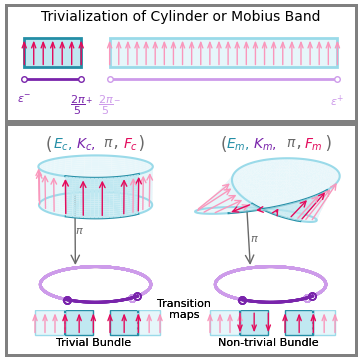

In [527]:
DEBUG_AXES = 'off'

fig = plt.figure(figsize=(3.5,3.5),
                              layout='constrained')
fig1, fig2 = fig.subfigures(2, 1,  hspace=.02, height_ratios=[1,2])

axd = fig2.subplot_mosaic([['cyl', 'mb']])

axd['cyl'] = nt.setup_bundle_axes(axd['cyl'], DEBUG_AXES)
axd['mb'] = nt.setup_bundle_axes(axd['mb'], DEBUG_AXES)


#axd['local'].axis(DEBUG_AXES)

nt.draw_segmented_bundle(axd['cyl'], nt.plot_cylinder, ("Trivial", "c"))
nt.draw_segmented_bundle(axd['mb'], nt.plot_mobius_band, ("Non-trivial", "m")) 

ax = fig1.subplots()

ax.set( ylim=(0, 1), xlim=(config['t'][0]-config['boundary_pad'], 
                                     config['t'][-1]+config['boundary_pad']))
ax.set_title("Trivialization of Cylinder or Mobius Band",fontsize=config['tfs'],
                      color='k')
for (x0, x1), (tc, fc, bc) in [(config['r1'], config['dark_colors']), 
                               (config['r2'], config['light_colors'])]:
    rect = mpatches.Rectangle((x0, config['ry']), height = config['rh'], 
                              width=(x1-x0), 
                              edgecolor=tc, facecolor=pc.lighten(tc,.25), 
                              lw=config['lw'])
    ax.add_patch(rect)
    ax.plot([x0, x1], [config['ly'], config['ly']], lw=config['lw'], 
                      color=bc, marker='o', mfc='white',  markersize=4)

    for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*5) +1):
        at = mpatches.FancyArrowPatch(posA=(x, config['ry']), 
                                      posB=(x, config['ry']+ config['rh']),
                                        arrowstyle='->,head_width=0.15', 
                                      mutation_scale=10, edgecolor=fc)
        ax.add_patch(at)
        
    ax.set(xticks=config['r1'],
                     xticklabels=[r"$\epsilon^{-}$", r"${\dfrac{2\pi}{5}}^{+}$"])
    import matplotlib.ticker as mticker
    
    ax.xaxis.set_minor_locator(mticker.FixedLocator(config['r2']))
    ax.xaxis.set_minor_formatter(mticker.FixedFormatter([r"${\dfrac{2\pi}{5}}^{-}$", r"$\epsilon^{+}$"]))
    
    ax.tick_params('x', which='major', labelcolor=pcd['base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('x', which='minor', labelcolor=config['light_base'], 
                             length=0, labelsize=config['fs'])
    ax.tick_params('y', labelleft=False, left=False)
    ax.spines[:].set_visible(False)
    
    


    fig2.text(.51, 0.2, "Transition\nmaps", ha="center", va="center", color='k', 
                      fontsize=config['fs'] )

for subfig in [fig1,fig2]:
    #fig0.frameon=True
    subfig.set_edgecolor('gray')
    subfig.set_linewidth(2)


fig.savefig(paper_path/"transition_maps.png",dpi=200)

In [168]:
config['zm'].max()+config['zm_off']

1.65

In [ ]:
dict(zip(['1','2','3'],(1,2,3)))

In [ ]:
mask.sum()

In [ ]:
fig, ax = plt.subplots()
ax.figure

In [79]:
")".find("(") 

-1